In [1]:
# !pip install catboost

In [9]:
from pyforest import *
import seaborn as sns

from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score,classification_report
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
df = pd.read_csv('heart.csv')
df

<IPython.core.display.Javascript object>

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Train-Test Split:

In [4]:
from sklearn.model_selection import train_test_split

#spliting the df
y = df['output']
x = df.drop('output', axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=1)

## Scaler

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
scaled_X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
model = SVC()

model.fit(scaled_X_train, y_train)
test_pred = model.predict(scaled_X_test)

model_acc = (accuracy_score(y_test,test_pred), 4)*100
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        30
           1       0.72      0.84      0.78        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



## Gridsearch

In [14]:
#Running GridSearch to find the most optimal 
clf = SVC()
parameters = {
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma':['scale', 'auto'],
    'max_iter':[2, 3, 4, -1 ],
    'decision_function_shape': ['ovo', 'ovr']} 

grid = GridSearchCV(clf,
                    parameters, n_jobs=4,
                    scoring="accuracy",
                    cv=5,
                    verbose=2)
#                     return_train_score=True)

grid.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  44 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 320 out of 320 | elapsed:    1.7s finished


GridSearchCV(cv=5, estimator=SVC(), n_jobs=4,
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'max_iter': [2, 3, 4, -1]},
             scoring='accuracy', verbose=2)

In [15]:
grid.best_params_

{'decision_function_shape': 'ovo',
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1}

In [16]:
params_final = {'decision_function_shape': 'ovo',
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1}

In [21]:
model2 = SVC(decision_function_shape= 'ovo',
 gamma= 'auto',
 kernel= 'rbf',
 max_iter= -1)

model2.fit(scaled_X_train, y_train)
test_pred = model2.predict(scaled_X_test)

model_acc = (accuracy_score(y_test,test_pred), 4)*100
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        30
           1       0.72      0.84      0.78        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



In [22]:
def print_metrics(labels, preds, scaled_data_test, y_train, y_hat_train):
 
        plot_confusion_matrix(model2, scaled_data_test, y_test, values_format='.3g')
        
        print('Training Precision: ', precision_score(y_train, y_hat_train, average='macro'))
        print('Testing Precision: ', precision_score(labels, preds, average='macro'))
        print('Training Recall: ', recall_score(y_train, y_hat_train, average='macro'))
        print('Testing Recall: ', recall_score(labels, preds, average='macro'))
        print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
        print('Testing Accuracy: ', accuracy_score(labels, preds))
        print('Training F1-Score: ', f1_score(y_train, y_hat_train, average='macro'))
        print('Testing F1-Score: ', f1_score(labels, preds, average='macro'))

Training Precision:  0.9326943332631135
Testing Precision:  0.7815315315315315
Training Recall:  0.925787728026534
Testing Recall:  0.7688172043010753
Training Accuracy:  0.9297520661157025
Testing Accuracy:  0.7704918032786885
Training F1-Score:  0.9284210526315789
Testing F1-Score:  0.7674291938997821


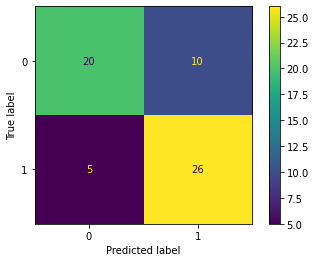

In [23]:
print_metrics(y_test, test_preds, scaled_X_test, y_train, train_preds)

## XGBoost:

In [ ]:
#Need to turn X_train and X_test into a DMatrix
D_train = xgb.DMatrix(scaled_X_train, label=y_train)
D_test = xgb.DMatrix(scaled_X_test, label=y_test)

In [ ]:
clf = xgb.XGBClassifier()
parameters = {
    'eta': [0.005, 0.01, 0.02, 0.3],  
    'max_depth': [2, 3, 4, 5, 6],  
    'objective': ['multi:softprob', 'multi:softmax'],
    'num_class': [2, 3, 4, 5]} 

grid = GridSearchCV(clf,
                    parameters, n_jobs=4,
                    scoring="recall",
                    cv=5,
                    verbose=3)
#                     return_train_score=True)

grid.fit(X_train, y_train)